**Author:** Artyom Pak  
**Date:** 07/30/2021  
**Email:** artyomvp1@gmail.com

# Introduction
In this case study I will be analyzing video game sales (1980-2017). During the whole process I am going to use the Python programming language and demonstrate the skill working with data sets and visualizations. 

# Stage 1: Ask questions and determine tasks
#### The business tasks:
* Exploration and analysis
* Determine most successful companies, gaming genres, and platforms

# Stage 2: Preparation
**Data:** [click here](https://www.kaggle.com/gregorut/videogamesales)<br>
**License:** [click here](https://github.com/GregorUT/vgchartzScrape/blob/master/LICENSE)<br>
**Description**: This data set contains the information about video game sales above 100 000 copies. The data includes mostly the information about sales divided by regions.<br> However the information contains the data **only up to 2017**.<br>

#### Fields include
**Rank** - *Ranking of overall sales*<br>
**Name** - *The games name*<br>
**Platform** - *Platform of the games release*<br>
**Year** - *Year of the game's release*<br>
**Genre** - *Genre of the game*<br>
**Publisher** - *Publisher of the game*<br>
**NA_Sales** - *Sales in North America (in millions)*<br>
**EU_Sales** - *Sales in Europe (in millions)*<br>
**JP_Sales** - *Sales in Japan (in millions)*<br>
**Other_Sales** - *Sales in the rest of the world (in millions)*<br>
**Global_Sales** - *Total worldwide sales*<br>

# Stage 3: Process the data
The observation and analysis will be conducted using Python 3 (libraries `pandas`, `numpy` and `matplotlib`).

### 3.1 Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
games = pd.read_csv('../input/videogamesales/vgsales.csv')
games.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### 3.2. Observing the data set
According to the brief information below, the `Year` column contains a `float` data type. Also, the number of non-null values in the`Year` and `Publisher` columns is different next to the other columns. Duplicated values have not been found.

In [3]:
# Common information about the data set and attributes
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
# Empty values check
games.isna().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [5]:
# Duplicated rows check
games.duplicated().any()

False

### 3.3 Cleaning 
Since I am not able to get the information about the empty cells in the `Year` column, these rows will be dropped. The empty `Publisher` cells will be replaced with `Unknown` to minimize the cleaning impact to the analysis.

In [6]:
# Drop NA-values in YEAR
games.dropna(subset=['Year'], inplace=True)

# Handling NA-values in the Publisher
games.loc[games['Publisher'].isna() == True, ['Publisher']] = 'Unknown'

# Fixing 'Year' format
games['Year'] = games['Year'].apply(int)

# Stage 4: Analysis and visualization

### 4.1 Aggregated summary of top 100 games.
Having collected the summary we can clearly see that sales in the Northern America region are significantly bigger.

In [7]:
# Sorting and extracting top 100
hundred = games.sort_values('Global_Sales', ascending=False).head(100)

# Changing float format
pd.options.display.float_format = "{:.2f}".format

# Aggregated statistics
hundred[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,100.00,100.00,100.00,100.00,100.00
mean,7.05,4.21,2.05,1.32,14.62
std,5.87,3.51,2.05,1.56,9.94
min,0.98,0.01,0.00,0.08,7.34
25%,3.86,2.31,0.23,0.55,8.97
50%,5.67,3.38,1.64,0.86,11.25
75%,8.29,5.04,3.28,1.62,15.92
max,41.49,29.02,10.22,10.57,82.74


### 4.2 Global sales per year
As we see on the diagram below, the growth started in the 2000 and reached its peak a decade after. The growth is related to the popularity of game consoles starting in the beginning of the 21th century, whereas the downhill after 2009-2010 is coinciding with the [boom of the mobile gaming](https://www.statista.com/statistics/292507/mobile-contents-market-value-north-america/) industry. 

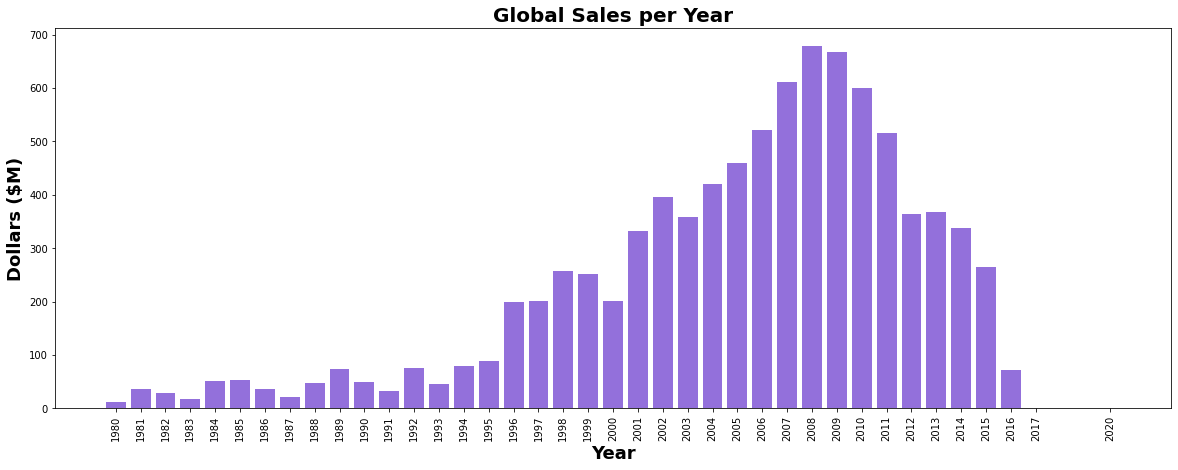

In [8]:
df_year = games.groupby('Year').sum().reset_index(drop=False)

# Plot parameters 
figsize = [20, 7]
x = df_year['Year']
y = df_year['Global_Sales']
width = 0.8
color = 'mediumpurple'

# Bar chart
plt.figure(figsize=figsize)
bars = plt.bar(x, y, 
               width=width, 
               color=color)

# Non-data objects
plt.title('Global Sales per Year', fontdict={'fontweight':'bold', 'fontsize':20})    # A bit of hardcoding
plt.xlabel('Year', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.ylabel('Dollars ($M)', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.xticks(df_year['Year'], rotation = 90)

plt.show()

### 4.3 Popularity of genres
The bar chart below represents the popularity of genres. [Action](https://en.wikipedia.org/wiki/Action_game), [sports](https://en.wikipedia.org/wiki/Sports_video_game), and [shooter](https://en.wikipedia.org/wiki/Shooter_game) are on the top and getting together they make up almost the third part of the whole. On the other hand adventure, strategy, and puzzles show unpopularity of genre. 

A video game genre is a specific category of games related by similar gameplay characteristics. Video game genres are not usually defined by the setting or story of the game or its medium of play, but by the way the player interacts with the game. Basically, genre is a classification assigned to a video game based primarily on its gameplay (type of interaction) rather than visual or narrative features.

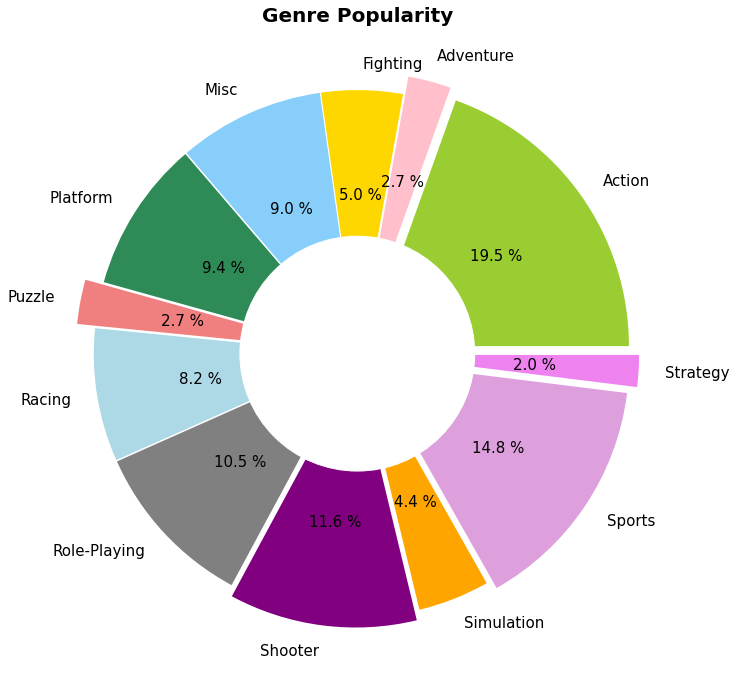

In [9]:
# Summary by genre
df_genre = games.groupby('Genre').sum().reset_index(drop=False)

# Plot parameters
figsize = [12, 12]
x = [i for i in df_genre['Global_Sales']]
labels = [i for i in df_genre['Genre']]
colors = ['yellowgreen','pink','gold','lightskyblue','seagreen','lightcoral','lightblue',
          'grey', 'purple', 'orange','plum','violet','magenta','cyan']
explode = [0.05 if df_genre['Genre'][i] in ['Action', 'Sports', 'Shooter'] else    # List comprehension
           0.08 if df_genre['Genre'][i] in ['Strategy', 'Puzzle', 'Adventure'] else 
           0.01 for i in range(len(df_genre['Genre']))]
autopct = '%.1f %%'
textprops = {'fontsize': 15}

# Pie chart
plt.figure(figsize=figsize)
plt.pie(x, 
        labels=labels, 
        colors=colors,
        autopct=autopct, 
        explode=explode,
        textprops=textprops)

# Make a hole, so it's a donut
my_circle=plt.Circle((0,0), 0.45, color='white')    # (0,0) - coordinated of the center, 0.45 - diameter
p=plt.gcf()
p.gca().add_artist(my_circle)

# Non-data objects
plt.title('Genre Popularity', fontdict={'fontweight':'bold', 'fontsize':20})

plt.show()

### 4.4 Platform
According to the data, [PlayStation 2](https://en.wikipedia.org/wiki/PlayStation_2), [Xbox 360](https://en.wikipedia.org/wiki/Xbox_360), and [PlayStation 3](https://en.wikipedia.org/wiki/PlayStation_3) have the most successful **game sales** rates globally.  
Game consoles has been popular for a few decades because of the advantages that consoles can provide over PCs (easy to use, cost less, no need to upgrade, etc.)

In [10]:
# Grouping sales by platform
platform = games[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']]
platform = platform.groupby('Platform').sum().sort_values('Global_Sales', ascending=False).reset_index(drop=False).head(10)
platform.style.set_properties(**{'background-color': 'turquoise'}, subset=['Global_Sales'])    # Highlight c column

,Platform,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,PS2,572.920000,332.630000,137.540000,1233.460000
1,X360,594.330000,278.010000,12.300000,969.610000
2,PS3,388.900000,340.470000,79.210000,949.350000
3,Wii,497.370000,264.350000,68.280000,909.810000
4,DS,388.560000,194.070000,175.020000,818.960000
5,PS,334.710000,212.380000,139.780000,727.390000
6,GBA,184.120000,74.590000,46.560000,313.560000
7,PSP,107.090000,67.160000,75.890000,291.710000
8,PS4,96.800000,123.700000,14.300000,278.100000
9,PC,92.100000,137.640000,0.170000,255.050000


### 4.5 Publishers

Following, I would like to emphasize three most successful companies and genres of video games they are focused on.  
[Nintendo](https://www.macrotrends.net/stocks/charts/NTDOY/nintendo/revenue), [EA](https://www.macrotrends.net/stocks/charts/EA/electronic-arts/revenue), and [Activision](https://www.macrotrends.net/stocks/charts/ATVI/activision-blizzard/revenue) have been showing a decent level of revenue over the years.

In [11]:
# Grouping sales by genre
publishers = games[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']]
publishers = publishers.groupby('Publisher').sum().sort_values('Global_Sales', ascending=False).reset_index(drop=False).head(10)
publishers.style.set_properties(**{'background-color': 'lightgreen'}, subset=['Global_Sales'])    # Highlight a column

,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Nintendo,815.750000,418.300000,454.990000,1784.430000
1,Electronic Arts,584.220000,367.380000,13.980000,1093.390000
2,Activision,426.010000,213.720000,6.540000,721.410000
3,Sony Computer Entertainment,265.220000,187.550000,74.100000,607.280000
4,Ubisoft,252.810000,163.030000,7.330000,473.540000
5,Take-Two Interactive,220.470000,117.950000,5.830000,399.300000
6,THQ,208.600000,94.600000,5.010000,340.440000
7,Konami Digital Entertainment,88.910000,68.620000,90.930000,278.560000
8,Sega,108.780000,81.410000,56.190000,270.700000
9,Namco Bandai Games,69.380000,42.610000,126.840000,253.650000


Although all of them spread their efforts to all video game markets, having visualized the data, it became clear that the companies have a tendency to focus on particular genres. For instance, the bar chart below shows that Nintendo makes the most of their revenue from platform games, whereas EA (well known for its sport simulator games) and Activision are aimed on sport games and shooters accordingly. 

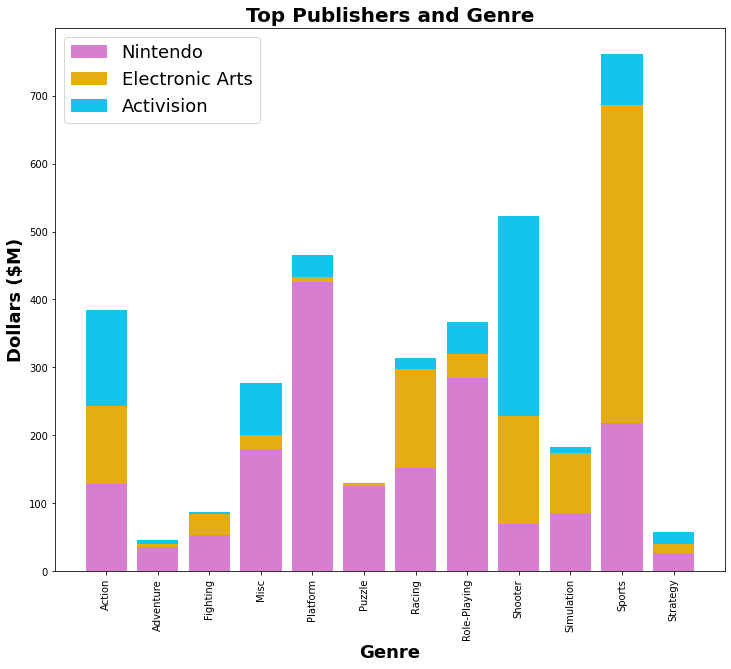

In [12]:
# Subsetd based on publisher
nd = games.loc[games['Publisher'] == 'Nintendo', ['Genre', 'Global_Sales']].groupby('Genre').sum().reset_index(drop=False)
ea = games.loc[games['Publisher'] == 'Electronic Arts', ['Genre', 'Global_Sales']].groupby('Genre').sum().reset_index(drop=False)
av = games.loc[games['Publisher'] == 'Activision', ['Genre', 'Global_Sales']].groupby('Genre').sum().reset_index(drop=False)

# Axis parameters
labels = [i for i in nd['Genre']]
y1 = np.array([i for i in nd['Global_Sales']])  # Has to be an array!
y2 = np.array([j for j in ea['Global_Sales']])
y3 = np.array([k for k in av['Global_Sales']])

# Bar chart (clustered)
plt.figure(figsize=(12, 10))
plt.bar(labels, y1, color='#d67ed0')
plt.bar(labels, y2, bottom=y1, color='#e6ad12')
plt.bar(labels, y3, bottom=y1+y2, color='#13c5ed')  # bottom - stacking

# Non-data objects
plt.title('Top Publishers and Genre', fontdict={'fontweight':'bold', 'fontsize':20})
plt.xlabel('Genre', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.ylabel('Dollars ($M)', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.xticks(rotation=90)
plt.legend(['Nintendo', 'Electronic Arts', 'Activision'], fontsize=18)

plt.show()

### Summary
* The most profitable region - **North America**
* Popular video game genres are **action**, **sport**, **shooter**
* Platforms with the biggest number of video games released: **PS2**, **Xbox 360**, **PS3**
* The most successful video game publishers: **Nintendo Co. Ltd.**, **Electronic Arts Inc.**, **Activision Publishing, Inc.**

# Recap
Computer games have been around for decades, providing entertainment for children and adults as well. Video games are a billion-dollar business and have been for many years. The video game industry has boomed in recent years because of the variety of ways to play games. As technology continues to improve, so do video games.

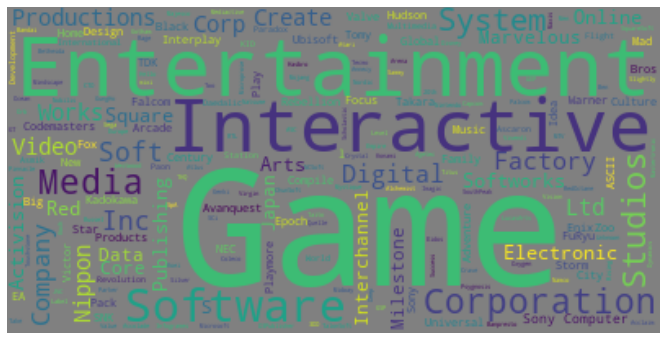

In [13]:
# Creating word cloud
text = ' '.join(games['Publisher'].unique())
wordcloud = WordCloud(max_font_size=100, background_color='gray').generate(text)

plt.figure(figsize=(17, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()